<a href="https://colab.research.google.com/github/kuntekaushik/Assignment3/blob/main/Assn3_Q3_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load dataset
df = pd.read_csv('co2_mm_mlo.csv',skiprows=40)


In [3]:
df.index = pd.to_datetime(df[['year', 'month']].apply(lambda x: '{}-{}'.format(x[0], x[1]), axis=1))

In [4]:
# Create X and y

# X = months since first measurement
month = np.array(range(len(df)))
y = df.average.values

month = month.reshape(-1, 1)
y = y.reshape(-1, 1)


In [5]:
K = 3
T = 1
data = np.concatenate((month,y),axis = 1)

# Function to create features and labels
def create_features(data, K, T):
    X, y = [], []
    for i in range(len(data) - K - T + 1):
        X.append(data[i:(i + K)])
        y.append(data[(i + K):(i + K + T)])
    return np.array(X), np.array(y).reshape(-1, T)

X, y = create_features(data[:,1], K, T)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = False)

# using MLP

In [7]:
# MLP model
mlp = MLPRegressor(hidden_layer_sizes=(100,100, 50), activation='relu', random_state=42)
mlp.fit(X_train, y_train)

# Predictions and evaluation
mlp_predictions = mlp.predict(X_test)
mlp_mse = mean_squared_error(y_test, mlp_predictions)
print(f"MLP MSE: {mlp_mse}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLP MSE: 5.629762870328437


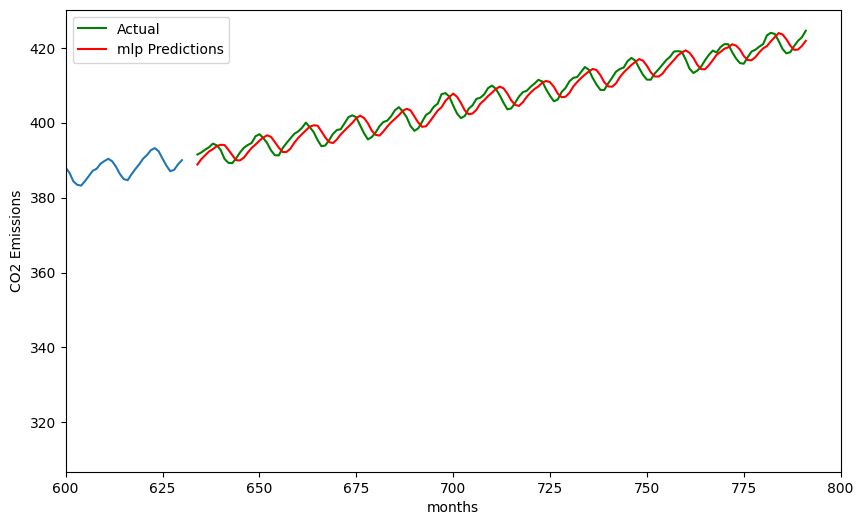

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(month[:len(X_train)],y_train)
plt.plot(month[-len(y_test):], y_test, label='Actual', color='green')
plt.plot(month[-len(X_test):],mlp_predictions,label='mlp Predictions', color='red')
plt.xlabel('months')
plt.ylabel('CO2 Emissions')
plt.xlim(600,800)
plt.legend()

# using ARMA

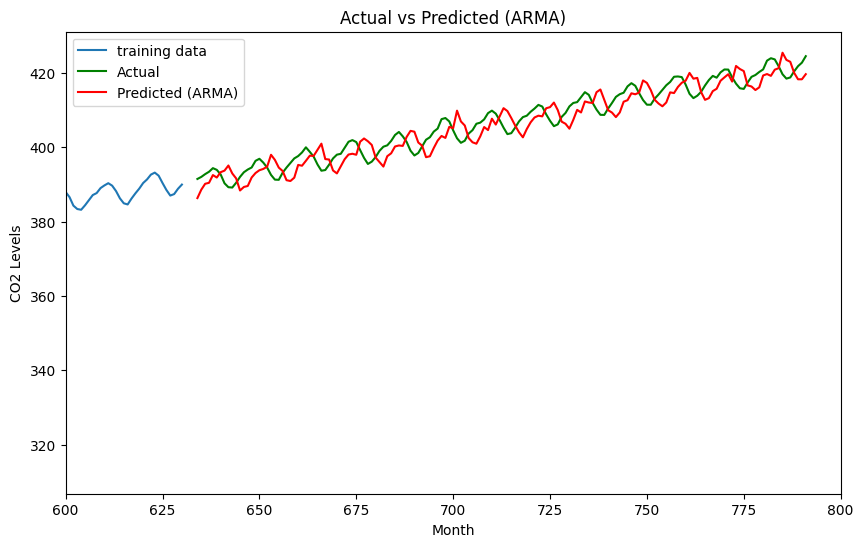

Mean Squared Error (ARMA): 14.245129293261805


In [9]:
from statsmodels.tsa.arima.model import ARIMA

# Train using ARIMA
history = [x[0] for x in X_train]
y_pred_arma = []

for i in range(len(X_test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    y_pred_arma.append(output[0])
    history.append(X_test[i][0])

# Calculate the Mean Squared Error
mse_arma = mean_squared_error(y_test, y_pred_arma)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(month[:len(y_train)],y_train,label='training data')
plt.plot(month[-len(y_test):], y_test, label='Actual', color='green')
plt.plot(month[-len(y_test):], y_pred_arma, label='Predicted (ARMA)', color='red')
plt.xlabel('Month')
plt.ylabel('CO2 Levels')
plt.title('Actual vs Predicted (ARMA)')
plt.legend()
plt.xlim(600,800)
plt.show()

print("Mean Squared Error (ARMA):", mse_arma)


# using Moving Average

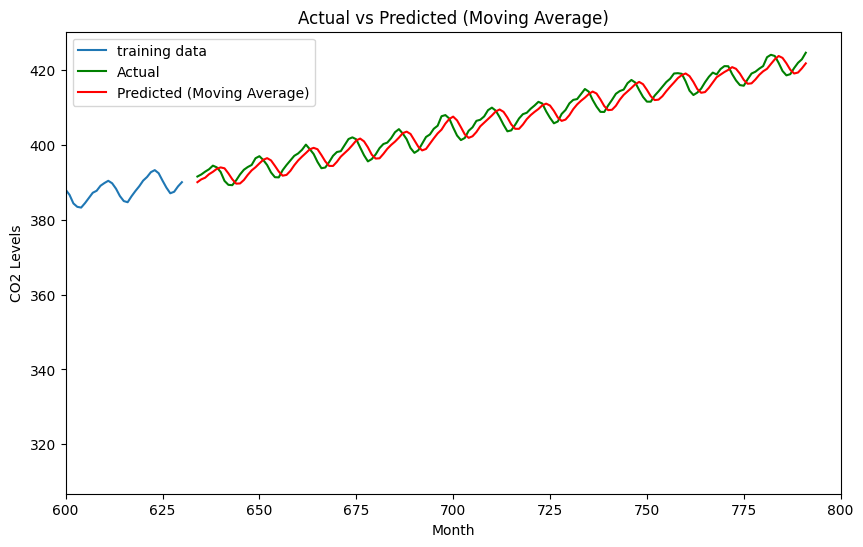

Mean Squared Error (Moving Average): 5.251293688466951


In [10]:
from sklearn.metrics import mean_squared_error

# Calculate moving average
window_size = 3  # You can adjust this according to your preference
y_pred_ma = pd.DataFrame(X_test).rolling(window=window_size, min_periods=1).mean().iloc[:, -1].values

# Calculate the Mean Squared Error
mse_ma = mean_squared_error(y_test, y_pred_ma)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(month[:len(y_train)],y_train,label='training data')
plt.plot(month[-len(y_test):], y_test, label='Actual',color='green')
plt.plot(month[-len(y_test):], y_pred_ma, label='Predicted (Moving Average)', color='red')
plt.xlabel('Month')
plt.ylabel('CO2 Levels')
plt.title('Actual vs Predicted (Moving Average)')
plt.legend()
plt.xlim(600,800)
plt.show()

print("Mean Squared Error (Moving Average):", mse_ma)